## B-scan parse

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
root = 'first-scan/data2/parsed/'

b_scan = None
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()

In [3]:
def join_as_complex(array):
    rows = []
    rows.append(array[0])
    for i in range(1, len(array)):
        if i % 2 == 0:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(complex_number)
    return rows

In [4]:
b_scan = join_as_complex(b_scan)

In [5]:
def average_values(array):
    rows = []
    for i in range(0, len(array), 5):
        row = []
        for j in range(len(array[i])):
            avg = (array[i][j] + array[i + 1][j] + array[i + 2][j] + array[i + 3][j] + array[i + 4][j]) / 5
            row.append(avg)
        rows.append(row)
    return rows

In [6]:
frequencies = b_scan[0]
b_scan = b_scan[2:] + [b_scan[1]]
b_scan = average_values(b_scan)

delta_t = 0.11764844292285792ns


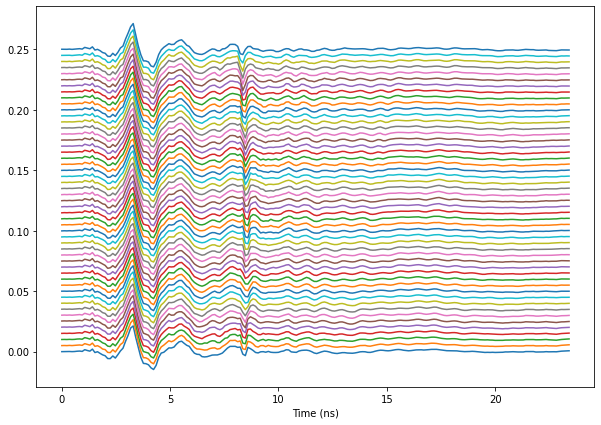

In [7]:
# calculate time step
delta_t = 1 / (frequencies[-1] - frequencies[0])
print('delta_t = ' + str(delta_t*1e9) + 'ns')

plt.figure(figsize=(10, 7))
plt.xlabel('Time (ns)')

for i in range(len(b_scan)):
    # create arrays for plotting
    y = np.fft.irfft(b_scan[i][0:1000])[:200] + i*0.005
    t = np.arange(0, delta_t * len(y), delta_t)

    plt.plot(t*1e9, y)

plt.show()

In [8]:
def draw_image(scan, cmap=None, aspect=None, interpolation=None, figsize=None, start_y=0, delta_w=7e9):
    plt.figure(figsize=figsize)
    plt.imshow(np.array(scan).transpose()[start_y:], cmap=cmap, aspect=aspect, interpolation=interpolation)
#     delta_t = 1 / delta_w
#     yticks = plt.yticks()#[0][1:-1]
#     ylabels = yticks * delta_t * 1e9
#     plt.yticks(yticks, ylabels)

## first-scan/

### data5

In [9]:
root = 'first-scan/data5/parsed/'
b_scan = None
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    break
    
b_scan = join_as_complex(b_scan)
b_scan = b_scan[2:] + [b_scan[1]]

cut_b_scan = np.array(b_scan)[:, 300:700]
zeros = np.zeros((201, 300))
b_scan_filtered = np.concatenate((zeros, cut_b_scan), axis=1)

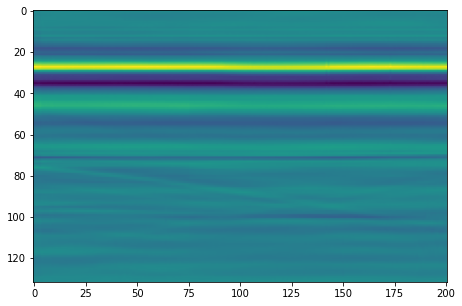

In [10]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan)[:, ::15])
draw_image(plot, aspect=1, figsize=(15, 5))

## second-scan/

First scan didn't show the results we were looking for (hyperbola shapes in the b-scan) so we performed additional scans with different parameters.

In [11]:
root = 'second-scan/parsed/'
data_files = []
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    data_files.append(b_scan)
    
def draw_scan(file_number, sample_nth=1, zero_padding=0, end_index=None, aspect=None, interpolation=None, figsize=None, cmap=None, start_y=0, delta_w=7e9):
    b_scan = data_files[file_number]
    b_scan = join_as_complex(b_scan)
    b_scan = b_scan[2:] + [b_scan[1]]
    
    cut_b_scan = np.array(b_scan)[:, zero_padding:]
    zeros = np.zeros((cut_b_scan.shape[0], zero_padding))
    b_scan_filtered = np.concatenate((zeros, cut_b_scan), axis=1)
    
    if end_index is not None:
        b_scan_filtered = b_scan_filtered[:end_index]
    
    plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan_filtered)[:, ::sample_nth])
    draw_image(plot, aspect=aspect, interpolation=interpolation, figsize=figsize, start_y=start_y, cmap=cmap, delta_w=delta_w/sample_nth)

### Jul 23, #1, 2
Nothing, 2mm resolution. **2 files**.

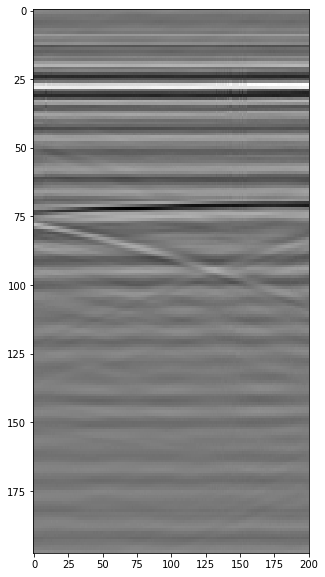

In [12]:
draw_scan(0, sample_nth=10, zero_padding=200, end_index=600, aspect=2, interpolation='nearest', figsize=(20, 10), start_y=0, cmap='gray')

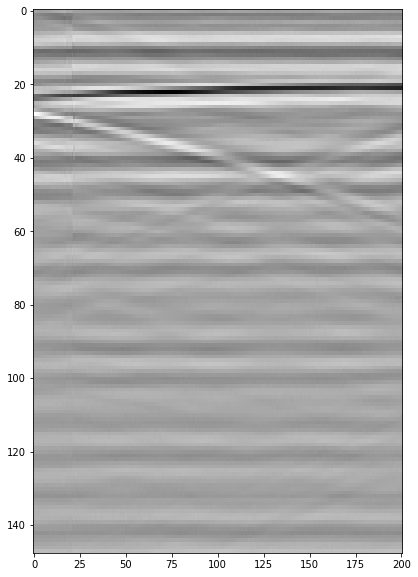

In [13]:
draw_scan(1, sample_nth=10, zero_padding=200, end_index=600, aspect=2, interpolation='nearest', figsize=(20, 10), start_y=50, cmap='gray')

### Jul 23, #3
Fat disc, 2mm resolution, 16cm depth.

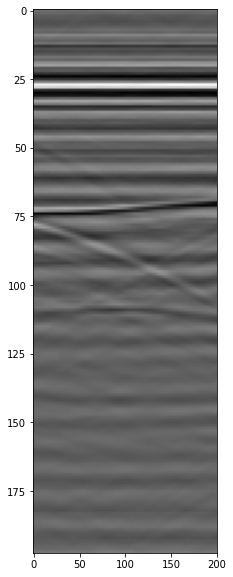

In [14]:
draw_scan(2, sample_nth=10, zero_padding=200, end_index=600, start_y=0, figsize=(20,10), cmap='gray', aspect=3)

### Jul 24, #1
Fat disc, 2mm resolution, 16cm depth.

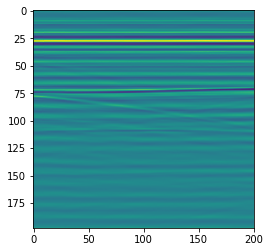

In [15]:
draw_scan(3, sample_nth=10, zero_padding=200, end_index=600)

### Jul 24, #2, 3
Fat disc in an open hole of 16cm depth, 2mm resolution, 16cm depth. **2 files**.

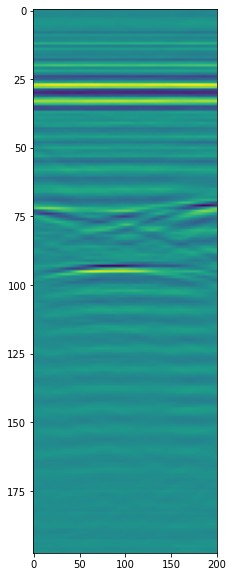

In [16]:
draw_scan(4, sample_nth=10, zero_padding=250, end_index=600, aspect=3, figsize=(20, 10))

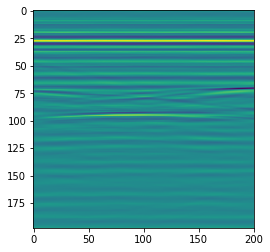

In [17]:
draw_scan(5, sample_nth=10, zero_padding=200, end_index=600)

### Jul 24, #4
Fat disc, 200 measure points, 16cm depth, 2mm resolution.

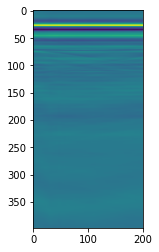

In [18]:
draw_scan(6, sample_nth=1, zero_padding=0, end_index=None)

### Jul 24, #5
Fat disc, 200 measure points, 16cm depth, 2mm resolution, SMA actual.

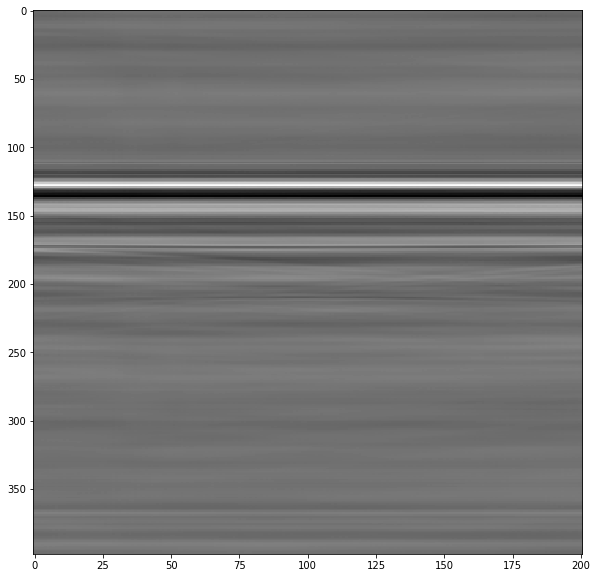

In [19]:
draw_scan(7, sample_nth=1, zero_padding=0, end_index=None, aspect=0.5, figsize=(20, 10), start_y=0, interpolation='Nearest', cmap='gray')

### Jul 24, #6
Fat disc, 2-6 GHz, 200 measure points, 16cm depth, SMA actual, 2mm resolution.

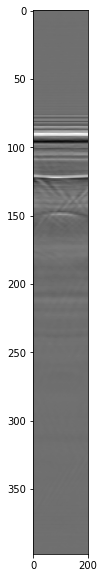

In [20]:
draw_scan(8, sample_nth=1, zero_padding=0, end_index=None, figsize=(20, 10), cmap='gray', start_y=0, aspect=5, delta_w=4e9)

### Jul 24, #7
Fat disc, 2-6 GHz, 200 measure points, 16cm depth, SMA actual, 2mm resolution, S11.

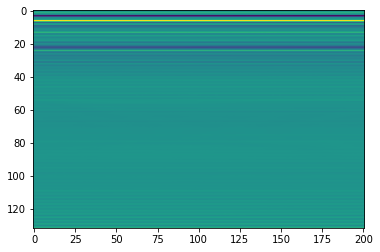

In [21]:
draw_scan(9, sample_nth=3, zero_padding=0, end_index=None)

### Jul 24, #8, 9
Fat disc, 2-6 GHz, 200 measure points, 16cm depth, SMA actual, 2mm resolution, S22, 2 files.

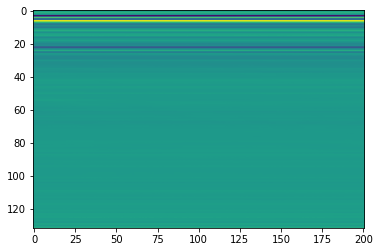

In [22]:
draw_scan(10, sample_nth=3, zero_padding=0, end_index=None)

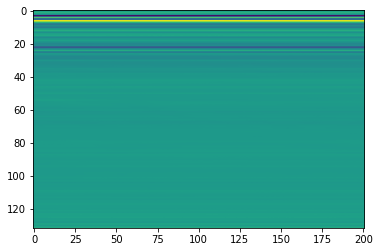

In [23]:
draw_scan(11, sample_nth=3, zero_padding=0, end_index=None)

### Jul 24, #10
Fat disc, 2-6 GHz, 1000 measure points, 16cm depth, SMA actual, 2mm resolution, S22.

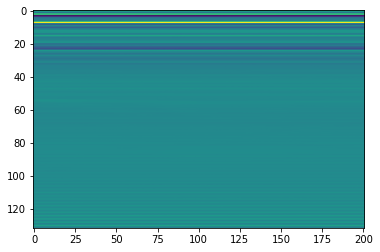

In [24]:
draw_scan(12, sample_nth=15, zero_padding=0, end_index=None)

### Jul 24, #11
PVC Pipe, 2-6 GHz, 1000 points, SMA actual, 2mm resolution, 25cm depth, S11.

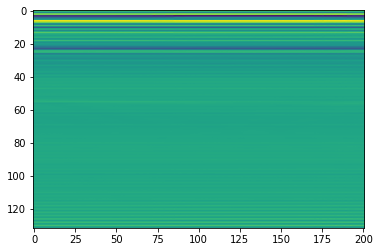

In [25]:
draw_scan(13, sample_nth=15, zero_padding=0, end_index=None)

### Jul 24, #12
PVC Pipe, 2-6 GHz, 1000 points, SMA actual, 2mm resolution, 25cm depth, S22.

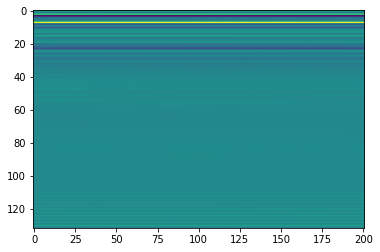

In [26]:
draw_scan(14, sample_nth=15, zero_padding=0, end_index=None)

### Jul 24, #13
PVC Pipe, 2-6 GHz, 1000 points, SMA actual, 2mm resolution, 25cm depth, S21.

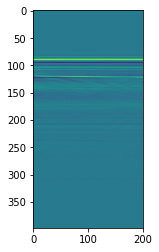

In [27]:
draw_scan(15, sample_nth=5, zero_padding=0, end_index=None)

### Jul 24, #14
PVC Pipe, 2-6 GHz, 1000 points, SMA actual, 2mm resolution, 25cm depth, S12.

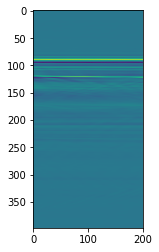

In [28]:
draw_scan(16, sample_nth=5, zero_padding=0, end_index=None)

### Jul 24, #15
PVC pipe, 2mm resolution, 300 points, SMA ideal, 25cm depth.

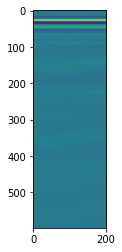

In [29]:
draw_scan(17, sample_nth=1, zero_padding=0, end_index=None)

### Jul 24, #16
PVC pipe, 2mm resolution, 200 points, 2-6 GHz, SMA ideal, 25cm depth.

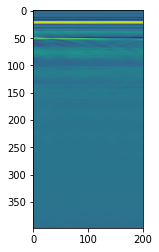

In [30]:
draw_scan(18, sample_nth=1, zero_padding=0, end_index=None)

### Jul 24, #17
Fat disc on top of sand, 2mm resolution, SMA actual.

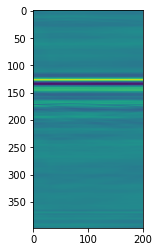

In [31]:
draw_scan(19, sample_nth=5, zero_padding=0, end_index=None)

## fourth-scan/

In [32]:
root = 'fourth-scan/parsed/'
data_files = []
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    data_files.append(b_scan)
    
def draw_scan(file_number, sample_nth=1, zero_padding=0, end_index=None, aspect=None, interpolation=None, figsize=None, cmap=None, start_y=0, delta_w=7e9):
    b_scan = data_files[file_number]
    b_scan = join_as_complex(b_scan)
    b_scan = b_scan[2:] + [b_scan[1]]
    
    cut_b_scan = np.array(b_scan)[:, zero_padding:]
    zeros = np.zeros((cut_b_scan.shape[0], zero_padding))
    b_scan_filtered = np.concatenate((zeros, cut_b_scan), axis=1)
    
    if end_index is not None:
        b_scan_filtered = b_scan_filtered[:end_index]
    
    plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan_filtered)[:, ::sample_nth])
    draw_image(plot, aspect=aspect, interpolation=interpolation, figsize=figsize, start_y=start_y, cmap=cmap, delta_w=delta_w/sample_nth)

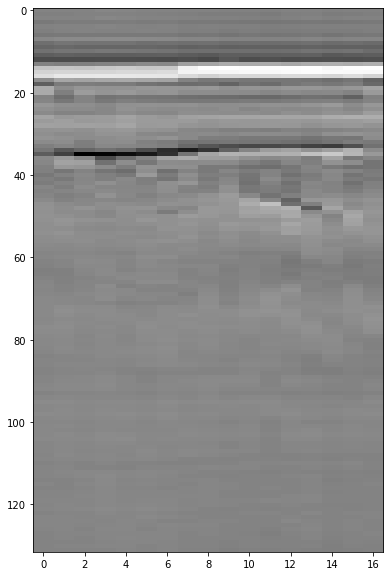

In [33]:
draw_scan(0, sample_nth=15, zero_padding=10, end_index=20, aspect=0.2, interpolation='nearest', figsize=(10, 10), start_y=0, cmap='gray')

In [34]:
import pickle

In [35]:
pkl_filename = "pickle_model.pkl"

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [36]:
def join_as_complex2(array):
    rows = []
    for i in range(0, len(array)):
        if i % 2 == 1:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(abs(complex_number))
    return rows

In [40]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(oct_9, [1] * (len(oct_9)))
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(oct_9)

NameError: name 'oct_9' is not defined

In [41]:
probabilities = []
for i in range(len(oct_9)):
    probabilities.append(pickle_model.predict_proba([oct_9[i]])[:, 1][0])

NameError: name 'oct_9' is not defined

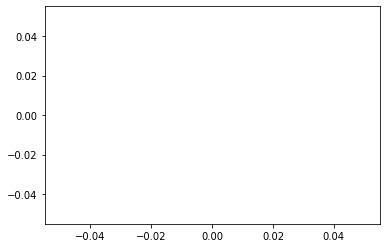

In [42]:
plt.plot(probabilities)

In [81]:
root = 'sixth-scan/parsed/'
data_files = []
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    data_files.append(b_scan)
    
def draw_scan(file_number, sample_nth=1, zero_padding=0, end_index=None, aspect=None, interpolation=None, figsize=None, cmap=None, start_y=0, delta_w=3e9, background_filter=False):
    b_scan = data_files[file_number]
    b_scan = join_as_complex(b_scan)
    b_scan = b_scan[2:] + [b_scan[1]]
    
    cut_b_scan = np.array(b_scan)[:, zero_padding:]
    zeros = np.zeros((cut_b_scan.shape[0], zero_padding))
    b_scan_filtered = np.concatenate((zeros, cut_b_scan), axis=1)
    
    if end_index is not None:
        b_scan_filtered = b_scan_filtered[:, :end_index]
    
    plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan_filtered)[:, ::sample_nth])
    
    if background_filter:
        for i in range(len(plot[0])):
            average = np.average(plot[:, i])
            plot[:, i] -= average
            
    draw_image(plot, aspect=aspect, interpolation=interpolation, figsize=figsize, start_y=start_y, cmap=cmap, delta_w=delta_w/sample_nth)

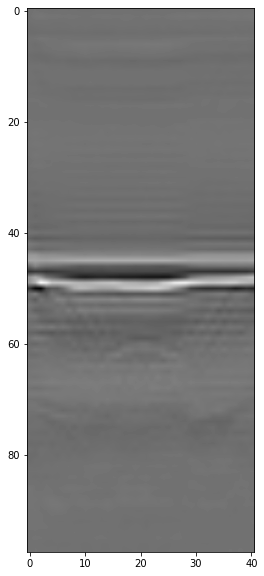

In [100]:
draw_scan(0, background_filter=False, sample_nth=2, zero_padding=8, end_index=None, aspect=1, interpolation='bilinear', figsize=(10, 10), start_y=0, cmap='gray')